In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [32]:
dataset1 = '2-wayEpi_100feat.txt'
dataset2 = '4-wayAdditive_100feat.txt'
dataset3 = '2Additive_2-wayEpi_100feat.txt'
dataset4 = '4-wayHeterogeneous_100feat.txt'

In [33]:
dataset = dataset1
df = pd.read_csv(dataset, sep='\t')

Class distribution
Class
1    500
0    500
Name: count, dtype: int64


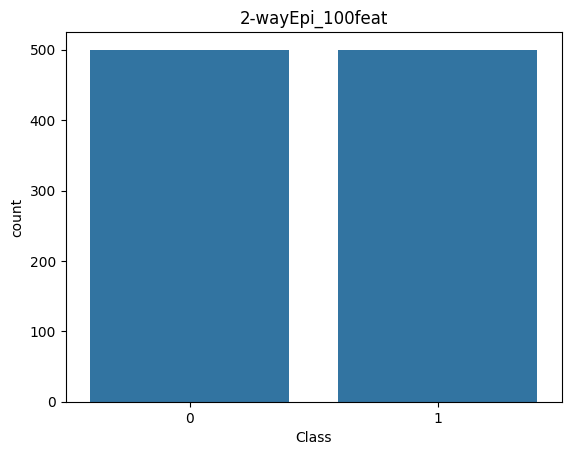

In [34]:
# Check for data imbalance
print('Class distribution')
print(y.value_counts())

# Plot the data
sns.countplot(x='Class', data=df)
plt.title(dataset[:-4])
plt.show()

In [35]:
# Print feature if it has missing values else print None
print('Features with missing values:')
if X.isnull().sum().any():
    print(X.columns[X.isnull().sum() > 0])
else:
    print('None')


Features with missing values:
None


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
13/13 [==============================] - 3s 62ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.5500
Epoch 2/150
13/13 [==============================] - 0s 22ms/step - loss: 0.6949 - accuracy: 0.5113 - val_loss: 0.6900 - val_accuracy: 0.5650
Epoc

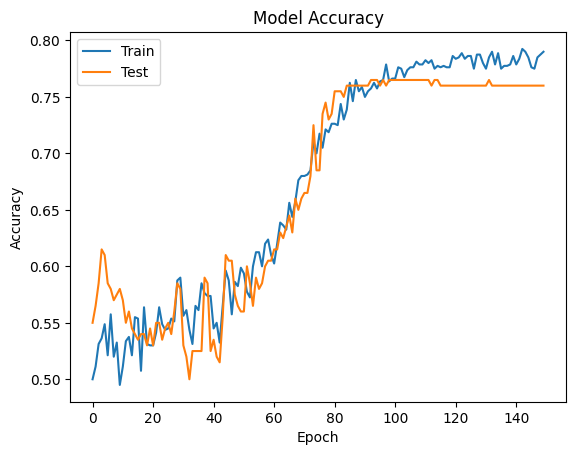

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the LSTM model using Keras and TensorFlow 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

# Adam optimizer with learning rate of 0.01
learning_rate = 0.01
adam = Adam(lr=learning_rate)

# Create the LSTM model
model = Sequential()
model.add(LSTM(10, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))

# Plot the accuracy of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

7/7 [==============================] - 1s 6ms/step


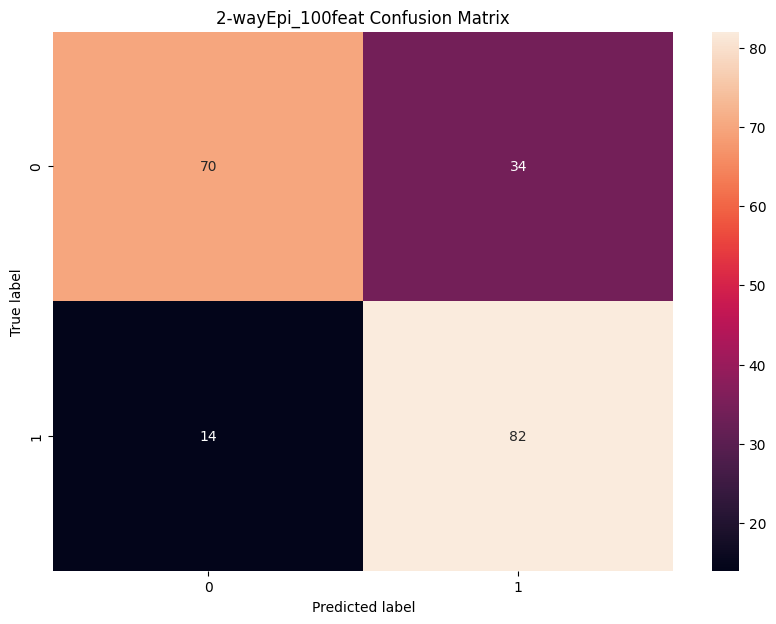

In [38]:
# Draw confusion matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title(dataset[:-4] + ' Confusion Matrix')
plt.show()


In [39]:
# Generate evaluation metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.67      0.74       104
           1       0.71      0.85      0.77        96

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200

